In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go

In [62]:
sns.set_theme(style="whitegrid", palette="tab10")
sns.set_context("notebook", font_scale=1.1)
plt.style.use('dark_background')

In [63]:
fligth_df  = pd.read_csv(r"C:\Users\somph\Documents\data_project\airline_royalty\data_airline_loyalty\Customer Flight Activity.csv")
loyalty_df = pd.read_csv(r"C:\Users\somph\Documents\data_project\airline_royalty\data_airline_loyalty\Customer Loyalty History.csv")
calendar_df = pd.read_csv(r"C:\Users\somph\Documents\data_project\airline_royalty\data_airline_loyalty\Calendar.csv")

**Behavior-Based Segmentation**

In [64]:
loyalty_df.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [65]:
fligth_df.head()

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100590,2018,6,12,15276,22914.0,0,0
1,100590,2018,7,12,9168,13752.0,0,0
2,100590,2018,5,4,6504,9756.0,0,0
3,100590,2018,10,0,0,0.0,512,92
4,100590,2018,2,0,0,0.0,0,0


In [66]:
loyalty_df.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [67]:
b_cluster = fligth_df.copy().drop(columns = ["Month", "Year"]).groupby("Loyalty Number").sum().reset_index()
b_cluster 

,Loyalty Number,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,46,81190,81190.0,1513,272
1,100102,51,68918,68918.0,1195,215
2,100140,47,72856,72856.0,593,107
3,100214,22,38236,38236.0,861,155
4,100272,37,54997,54997.0,1007,182
...,...,...,...,...,...,...
16732,999902,50,83725,83725.0,876,158
16733,999911,0,0,0.0,0,0
16734,999940,18,28275,28275.0,672,121
16735,999982,6,8323,8323.0,0,0


In [68]:
loyalty_df_temp = loyalty_df.copy()
loyalty_df_temp["month_active"] = loyalty_df_temp["month_active"] = np.where(
    loyalty_df_temp["Cancellation Year"].notnull(),  
    ((loyalty_df_temp["Cancellation Year"] - loyalty_df_temp["Enrollment Year"]) * 12) + 
    (loyalty_df_temp["Cancellation Month"] - loyalty_df_temp["Enrollment Month"]),
    ((2018 - loyalty_df_temp["Enrollment Year"]) * 12) + (12 - loyalty_df_temp["Enrollment Month"])
)

active_df = loyalty_df_temp[["Loyalty Number", "month_active", "CLV", "Loyalty Card"]]
active_df

,Loyalty Number,month_active,CLV,Loyalty Card
0,480934,34.0,3839.14,Star
1,549612,33.0,3839.61,Star
2,429460,42.0,3839.75,Star
3,608370,70.0,3839.75,Star
4,530508,50.0,3842.79,Star
...,...,...,...,...
16732,823768,72.0,61850.19,Star
16733,680886,51.0,67907.27,Star
16734,776187,57.0,74228.52,Star
16735,906428,8.0,10018.66,Star


In [69]:
b_cluster = b_cluster.join(active_df.set_index("Loyalty Number"), on="Loyalty Number")
b_cluster 

,Loyalty Number,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,month_active,CLV,Loyalty Card
0,100018,46,81190,81190.0,1513,272,28.0,7919.20,Aurora
1,100102,51,68918,68918.0,1195,215,69.0,2887.74,Nova
2,100140,47,72856,72856.0,593,107,29.0,2838.07,Nova
3,100214,22,38236,38236.0,861,155,40.0,4170.57,Star
4,100272,37,54997,54997.0,1007,182,59.0,6622.05,Star
...,...,...,...,...,...,...,...,...,...
16732,999902,50,83725,83725.0,876,158,55.0,7290.07,Aurora
16733,999911,0,0,0.0,0,0,76.0,8564.77,Nova
16734,999940,18,28275,28275.0,672,121,17.0,20266.50,Nova
16735,999982,6,8323,8323.0,0,0,5.0,2631.56,Star


In [70]:
b_features = ["Total Flights", "Distance", "Points Accumulated", "Points Redeemed", "Dollar Cost Points Redeemed", "month_active"]
b_df = b_cluster[b_features]
scaler = StandardScaler()
b_df_scaled = pd.DataFrame(scaler.fit_transform(b_df), columns= b_features)
b_df_scaled.head()

,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,month_active
0,0.924978,1.364834,1.105523,1.085824,1.082883,-0.305605
1,1.221449,0.894490,0.701719,0.642042,0.641020,1.375814
2,0.984273,1.045420,0.831297,-0.198073,-0.196194,-0.264595
3,-0.498083,-0.281446,-0.307858,0.175932,0.175901,0.186517
4,0.391330,0.360946,0.243655,0.379681,0.385204,0.965712


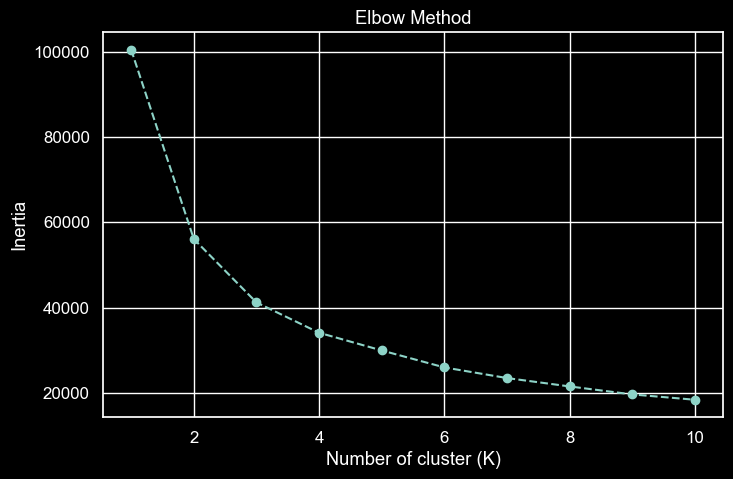

In [71]:
inertia = []
K_values = range(1,11)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=100,n_init='auto')
    kmeans.fit(b_df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize= (8,5))
plt.plot(K_values, inertia, marker = 'o', linestyle = '--')
plt.xlabel("Number of cluster (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [72]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=100 ,n_init='auto')
b_df_scaled["Cluster"] = kmeans.fit_predict(b_df_scaled)

b_cluster["Cluster"] = b_df_scaled["Cluster"]
print(b_cluster["Cluster"].value_counts())

Cluster
3    7071
1    4511
2    4277
0     878
Name: count, dtype: int64


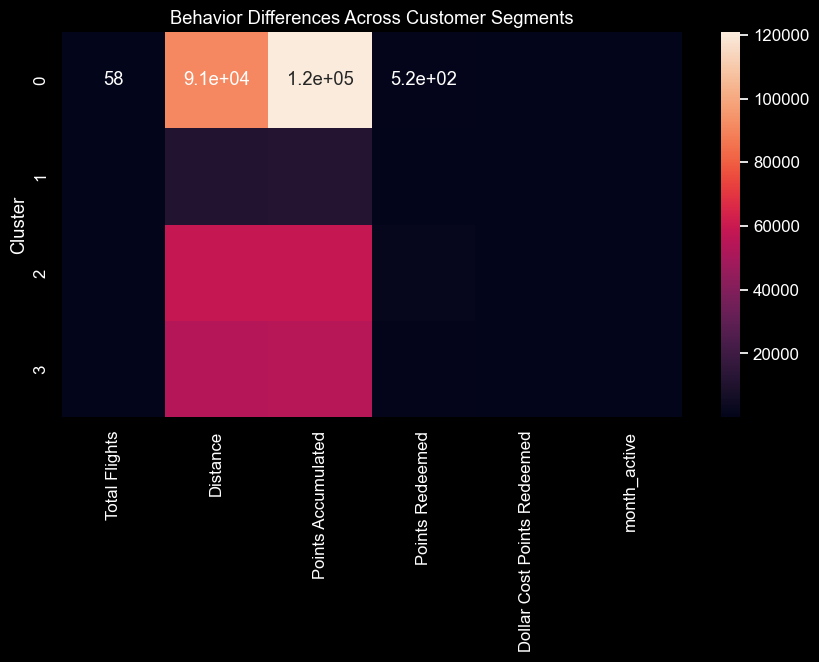

In [73]:
cluster_summary = b_cluster.groupby("Cluster")[b_features].mean()

plt.figure(figsize=(10,5))
sns.heatmap(cluster_summary,annot= True)
plt.title("Behavior Differences Across Customer Segments")
plt.show()

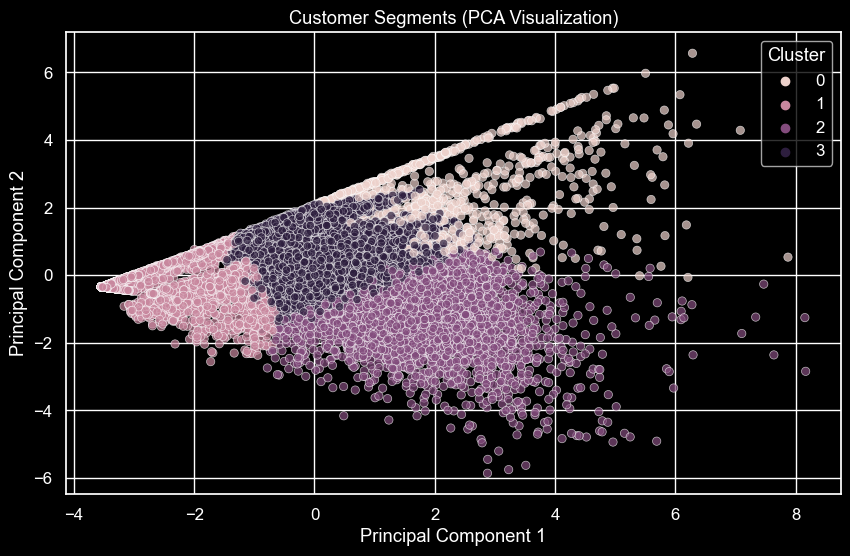

In [74]:
from sklearn.decomposition import PCA
scaled_data = scaler.fit_transform(b_cluster[b_features])

pca = PCA(n_components=2) 
pca_result = pca.fit_transform(scaled_data)
b_cluster["PCA1"] = pca_result[:, 0]
b_cluster["PCA2"] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=b_cluster, x="PCA1", y="PCA2", hue="Cluster", alpha=0.7)
plt.title("Customer Segments (PCA Visualization)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

**Customer Lifetime Value (CLV)**

In [75]:
b_cluster

,Loyalty Number,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,month_active,CLV,Loyalty Card,Cluster,PCA1,PCA2
0,100018,46,81190,81190.0,1513,272,28.0,7919.20,Aurora,2,2.295668,-0.149580
1,100102,51,68918,68918.0,1195,215,69.0,2887.74,Nova,2,2.175234,0.045680
2,100140,47,72856,72856.0,593,107,29.0,2838.07,Nova,3,1.117151,1.158139
3,100214,22,38236,38236.0,861,155,40.0,4170.57,Star,3,-0.326509,-0.560349
4,100272,37,54997,54997.0,1007,182,59.0,6622.05,Star,3,1.017169,-0.196063
...,...,...,...,...,...,...,...,...,...,...,...,...
16732,999902,50,83725,83725.0,876,158,55.0,7290.07,Aurora,3,2.147123,0.940339
16733,999911,0,0,0.0,0,0,76.0,8564.77,Nova,1,-2.679109,-0.545972
16734,999940,18,28275,28275.0,672,121,17.0,20266.50,Nova,1,-1.223751,-0.498783
16735,999982,6,8323,8323.0,0,0,5.0,2631.56,Star,1,-3.046571,-0.055358


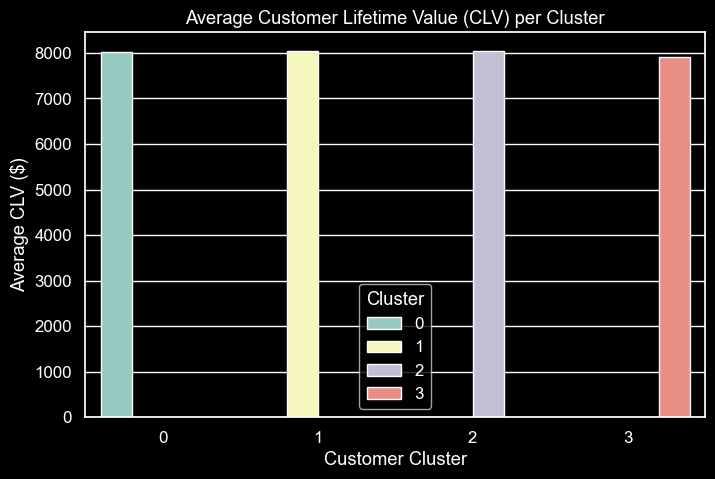

In [76]:
clv_per_cluster = b_cluster.groupby("Cluster")["CLV"].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=clv_per_cluster, x="Cluster", y="CLV", hue=clv_per_cluster["Cluster"].astype(str))
plt.xlabel("Customer Cluster")
plt.ylabel("Average CLV ($)")
plt.title("Average Customer Lifetime Value (CLV) per Cluster")

plt.show()

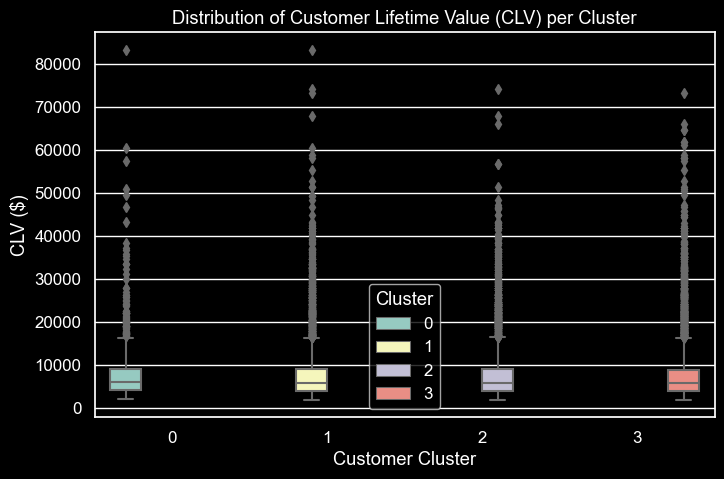

In [77]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=b_cluster, x="Cluster",hue ="Cluster", y="CLV")
plt.xlabel("Customer Cluster")
plt.ylabel("CLV ($)")
plt.title("Distribution of Customer Lifetime Value (CLV) per Cluster")
plt.show()

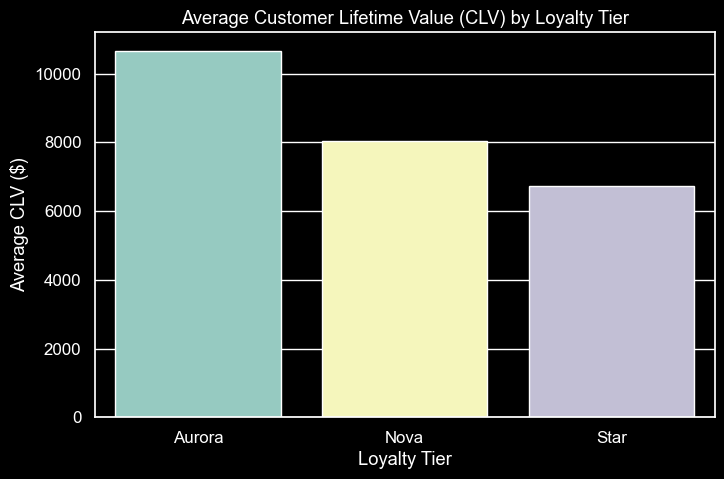

In [78]:
clv_by_tier = b_cluster.groupby("Loyalty Card")["CLV"].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=clv_by_tier, x="Loyalty Card", y="CLV")
plt.xlabel("Loyalty Tier")
plt.ylabel("Average CLV ($)")
plt.title("Average Customer Lifetime Value (CLV) by Loyalty Tier")

plt.show()


Model 2: Enhanced Segmentation: Behavioral + Customer Attributes (b_a).

In [79]:
loyalty_df_temp = loyalty_df.copy()
loyalty_df_temp["month_active"]  = np.where(
    loyalty_df_temp["Cancellation Year"].notnull(),  
    ((loyalty_df_temp["Cancellation Year"] - loyalty_df_temp["Enrollment Year"]) * 12) + 
    (loyalty_df_temp["Cancellation Month"] - loyalty_df_temp["Enrollment Month"]),
    ((2018 - loyalty_df_temp["Enrollment Year"]) * 12) + (12 - loyalty_df_temp["Enrollment Month"])
)

active_df_2 = loyalty_df_temp[["Loyalty Number", "Country", "Gender", "Enrollment Type"]]

b_a_cluster = b_cluster.join(active_df_2.set_index("Loyalty Number"), on="Loyalty Number")

In [80]:
b_a_cluster.columns

Index(['Loyalty Number', 'Total Flights', 'Distance', 'Points Accumulated',
       'Points Redeemed', 'Dollar Cost Points Redeemed', 'month_active', 'CLV',
       'Loyalty Card', 'Cluster', 'PCA1', 'PCA2', 'Country', 'Gender',
       'Enrollment Type'],
      dtype='object')

In [81]:
categorical_features = [ "Country", "Gender", "Enrollment Type"]
b_a_cluster = pd.get_dummies(b_a_cluster, columns=categorical_features, drop_first=True)
label_encoder = LabelEncoder()
b_a_cluster["Loyalty Card"] = label_encoder.fit_transform(b_a_cluster["Loyalty Card"])

In [82]:
b_a_cluster.columns

Index(['Loyalty Number', 'Total Flights', 'Distance', 'Points Accumulated',
       'Points Redeemed', 'Dollar Cost Points Redeemed', 'month_active', 'CLV',
       'Loyalty Card', 'Cluster', 'PCA1', 'PCA2', 'Gender_Male',
       'Enrollment Type_Standard'],
      dtype='object')

In [83]:
b_a_features = ['Total Flights', 'Distance', 'Points Accumulated',
       'Points Redeemed', 'Dollar Cost Points Redeemed', 'month_active', 'CLV',
       'Loyalty Card', 'Gender_Male', 'Enrollment Type_Standard']

b_a_df = b_a_cluster[b_a_features]
scaler = StandardScaler()
b_a_df_scaled = pd.DataFrame(scaler.fit_transform(b_a_df), columns= b_a_features)
b_a_df_scaled.head()

,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,month_active,CLV,Loyalty Card,Gender_Male,Enrollment Type_Standard
0,0.924978,1.364834,1.105523,1.085824,1.082883,-0.305605,-0.010159,-1.618331,-0.995053,0.24817
1,1.221449,0.894490,0.701719,0.642042,0.641020,1.375814,-0.743525,-0.325134,1.004971,0.24817
2,0.984273,1.045420,0.831297,-0.198073,-0.196194,-0.264595,-0.750764,-0.325134,-0.995053,0.24817
3,-0.498083,-0.281446,-0.307858,0.175932,0.175901,0.186517,-0.556544,0.968062,1.004971,0.24817
4,0.391330,0.360946,0.243655,0.379681,0.385204,0.965712,-0.199226,0.968062,-0.995053,0.24817


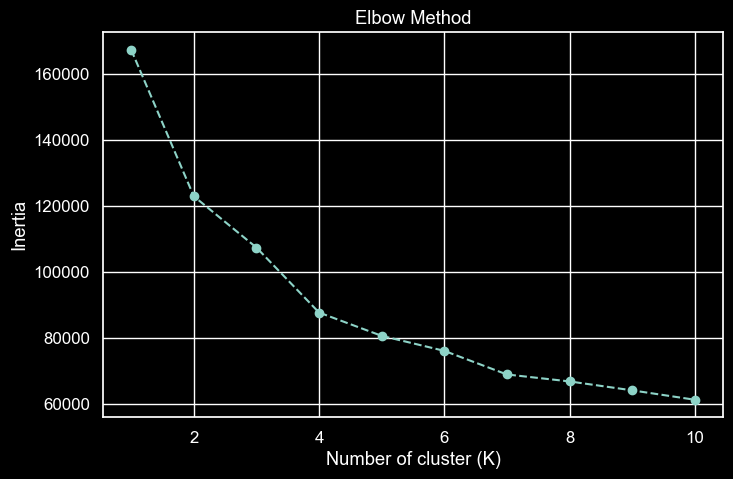

In [84]:
inertia = []
K_values = range(1,11)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=100,n_init='auto')
    kmeans.fit(b_a_df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize= (8,5))
plt.plot(K_values, inertia, marker = 'o', linestyle = '--')
plt.xlabel("Number of cluster (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [85]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=100, n_init='auto')
b_a_df_scaled["Cluster"] = kmeans.fit_predict(b_a_df_scaled)

b_a_cluster["Cluster"] = b_a_df_scaled["Cluster"]
print(b_a_cluster["Cluster"].value_counts())

Cluster
2    7055
1    4539
3    4232
0     911
Name: count, dtype: int64


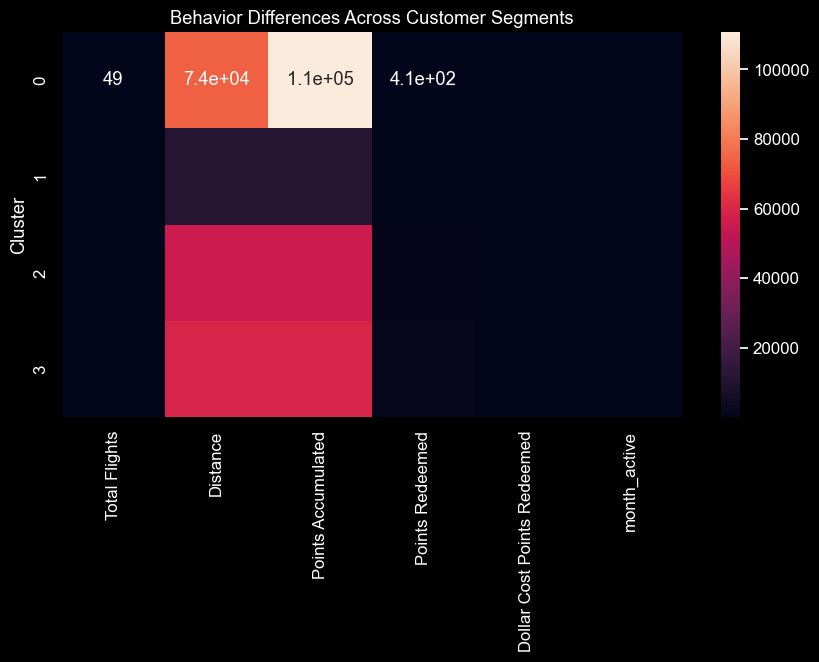

In [86]:
cluster_ba_summary = b_a_cluster.groupby("Cluster")[b_features].mean()

plt.figure(figsize=(10,5))
sns.heatmap(cluster_ba_summary,annot= True)
plt.title("Behavior Differences Across Customer Segments")
plt.show()

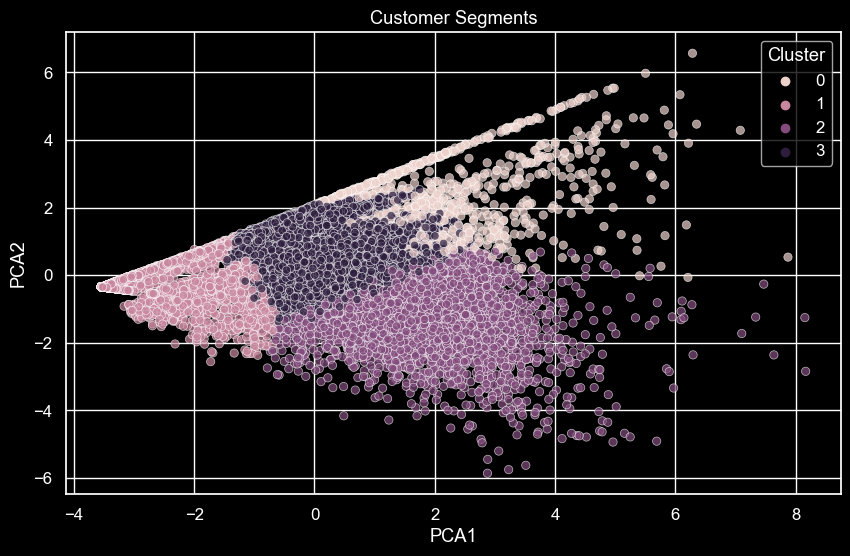

In [87]:
scaled_data = scaler.fit_transform(b_a_cluster[b_features])

pca = PCA(n_components=2) 
pca_result = pca.fit_transform(scaled_data)
b_a_cluster["PCA1"] = pca_result[:, 0]
b_a_cluster["PCA2"] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=b_cluster, x="PCA1", y="PCA2", hue="Cluster", alpha=0.7)
plt.title("Customer Segments")
plt.legend(title="Cluster")
plt.show()

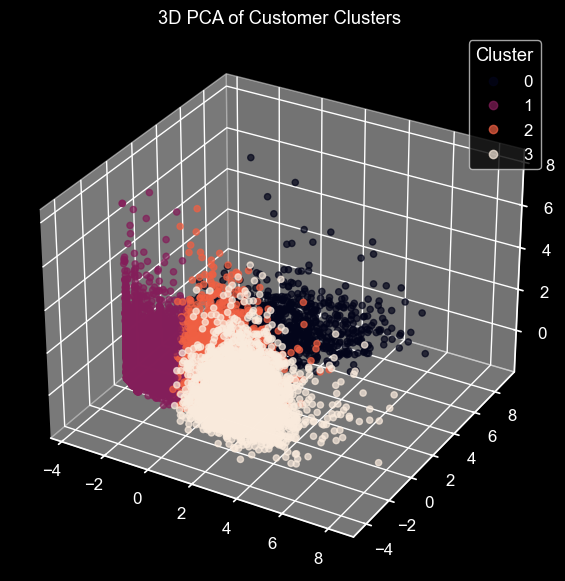

In [106]:
from mpl_toolkits.mplot3d import Axes3D  
pca = PCA(n_components=3)
pca_result = pca.fit_transform(b_a_df_scaled)
pca_df = pd.DataFrame(pca_result, columns=["PCA1", "PCA2", "PCA3"])
pca_df["Cluster"] = b_a_cluster["Cluster"].astype(str)  
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df["PCA1"], pca_df["PCA2"], pca_df["PCA3"],
                     c=pca_df["Cluster"].astype(int), alpha=0.7)
plt.title("3D PCA of Customer Clusters")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()


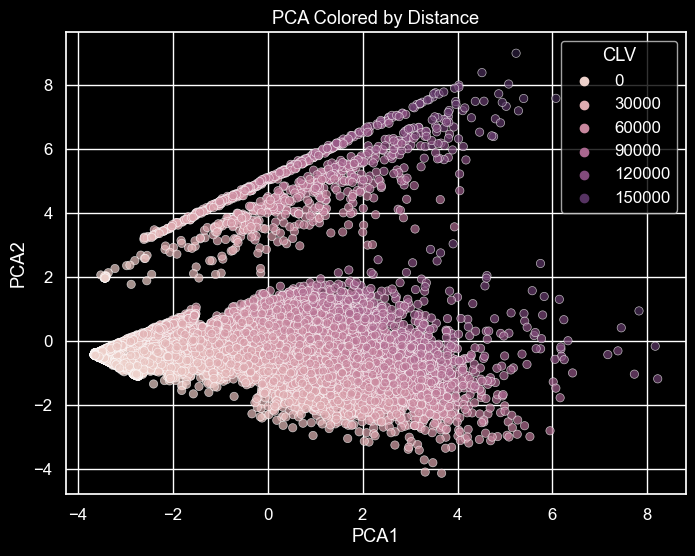

In [89]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=pca_df["PCA1"], y=pca_df["PCA2"],
    hue=b_a_cluster["Distance"], alpha=0.7
)
plt.title("PCA Colored by Distance")
plt.legend(title="CLV", loc='best')
plt.show()


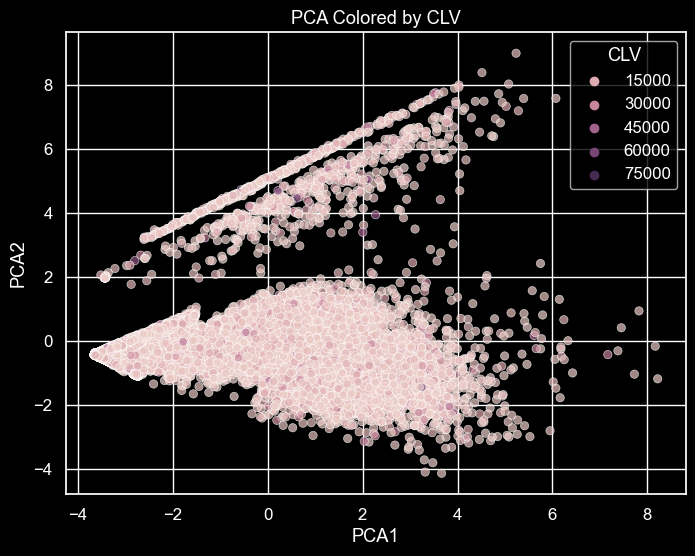

In [90]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=pca_df["PCA1"], y=pca_df["PCA2"],
    hue=b_a_cluster["CLV"], alpha=0.7
)
plt.title("PCA Colored by CLV")
plt.legend(title="CLV", loc='best')
plt.show()


In [107]:
features_pca = ["Distance", "CLV", "Points Accumulated", "month_active"]
titles = ["PCA Colored by Distance", "PCA Colored by CLV", "PCA Colored by Points Accumulated", "PCA Colored by Month Active"]
pca_df = pca_df.join(b_a_cluster[features_pca])
pca_df.columns

Index(['PCA1', 'PCA2', 'PCA3', 'Cluster', 'Distance', 'CLV',
       'Points Accumulated', 'month_active'],
      dtype='object')

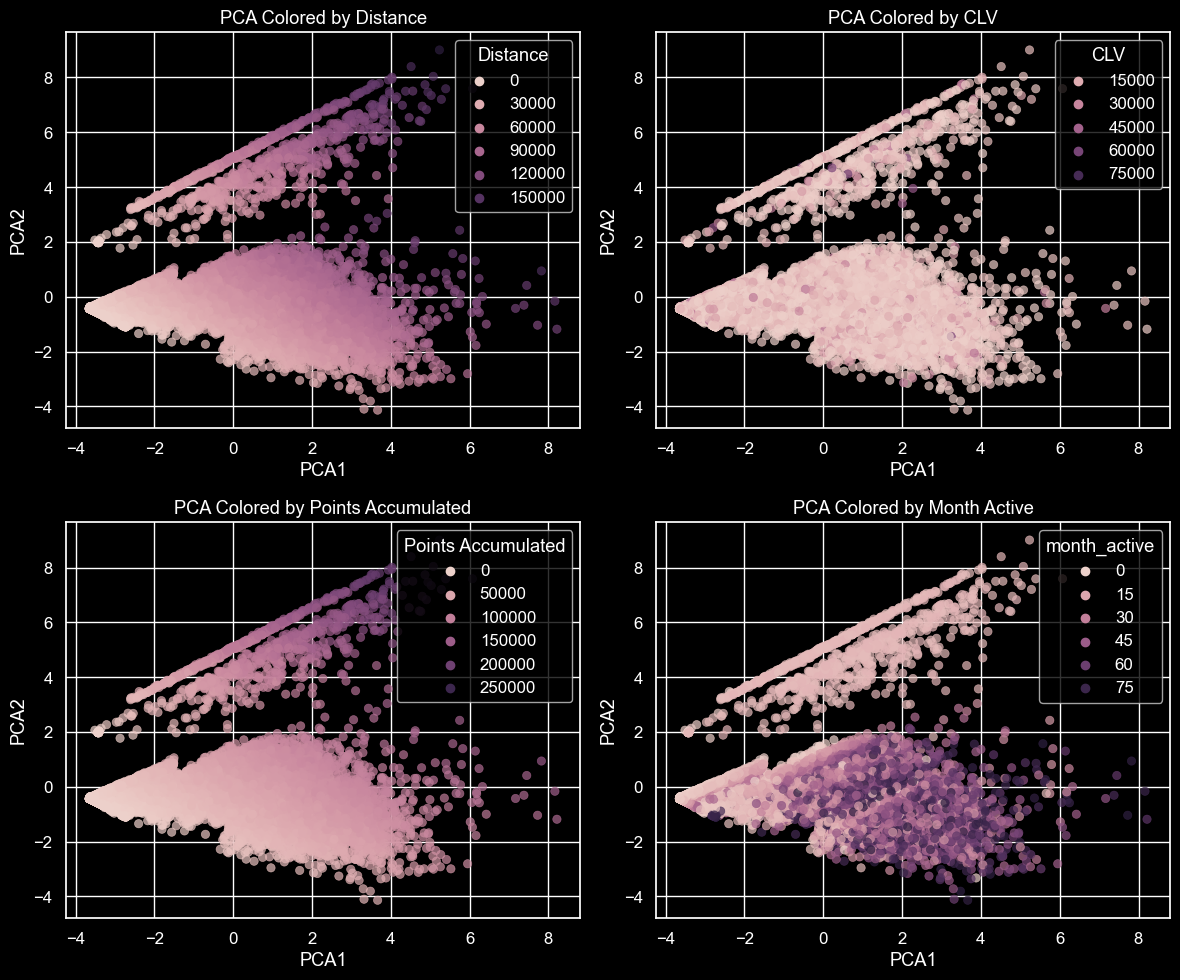

In [109]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
for i, (feature, title) in enumerate(zip(features_pca, titles)):
    row, col = divmod(i, 2)
    scatter = sns.scatterplot(
        x=pca_df["PCA1"], y=pca_df["PCA2"],
        hue=pca_df[feature],
       ax=ax[row][col], alpha=0.7, edgecolor=None
    )
    ax[row][col].set_title(title)
    ax[row][col].set_xlabel("PCA1")
    ax[row][col].set_ylabel("PCA2")
    ax[row][col].legend(title=feature, loc='best')

plt.tight_layout()
plt.show()